In [ ]:
pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.7 MB/s 


In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa
from  tensorflow_addons.metrics import RSquare
from tensorflow.keras import layers, optimizers, metrics
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import *
from sklearn.metrics import r2_score
from tensorflow.keras import Sequential
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import Normalizer, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# medical insurance data_set


### helper function
* normalization

In [ ]:
# if columns is given it pick those and if not it pick itself
# def normalize(data, columns_names= []):
#   norm= Normalizer()
#   df= norm.fit_transform(data)
#   if columns_names== True:
#     df= pd.DataFrame(df, columns= columns_names)
#   else :
#     df= pd.DataFrame(df, columns= data.columns)
#   return df

def normalize(data):
  norm= Normalizer()
  df= norm.fit_transform(data)
  df= pd.DataFrame(df, columns= data.columns)
  return df

plot

In [ ]:
def plot_loss(history):
  plt.subplot(1 ,2,1)
  plt.plot(history.history['r_square'], label='score')
  plt.plot(history.history['val_r_square'], label='val_score')
  plt.xlabel('Epoch')
  plt.ylabel('score')
  plt.grid(True)
  # plt.ylim([40, 200])
  plt.subplot(1 ,2,2)
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [trgt]')
  plt.legend()
  plt.grid(True)

updated version
* it give us the optimizer detail
* learning rate
* score

In [ ]:
def plot_loss(history):
  # print(str(history.model.optimizer.learning_rate))
  i= str(history.model.optimizer.learning_rate)
  # string methods
  print('\n')
  o= i.split()[1].split('/')[0]
  l= i.split()[-1].split('=')[-1].replace('>', '')
  print(f'Optimizer : {o} \n Leraning_rate : {l}')
  print('\n')
  a= history.history['r_square'][-1]
  b= history.history['val_r_square'][-1]
  print(f'Traning Score : {a}')
  print(f'Val Score : {b}')
  print('\n')
  plt.figure(figsize= (11,5))
  plt.subplot(1 ,2,1)
  plt.plot(history.history['r_square'], label='score')
  plt.plot(history.history['val_r_square'], label='val_score')
  plt.xlabel('Epoch')
  plt.ylabel('score')
  plt.grid(True)
  # plt.ylim([40, 200])
  plt.subplot(1 ,2,2)
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [trgt]')
  plt.legend()
  plt.grid(True)

##data preporcessing and visulaization

In [ ]:
data= pd.read_csv('/content/insurance.csv')
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

find the no of unique values of the each columns

In [ ]:
data.nunique(axis=0)

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [ ]:
data['region'].nunique()

4

get the unique values in columns

In [ ]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

only vlaues of column region --> northwest

In [ ]:
data[data['region']=='northwest']


,age,sex,bmi,children,smoker,region,charges
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
7,37,female,27.740,3,no,northwest,7281.50560
9,60,female,25.840,0,no,northwest,28923.13692
24,37,male,28.025,2,no,northwest,6203.90175
...,...,...,...,...,...,...,...
1319,39,female,26.315,2,no,northwest,7201.70085
1320,31,male,31.065,3,no,northwest,5425.02335
1324,31,male,25.935,1,no,northwest,4239.89265
1333,50,male,30.970,3,no,northwest,10600.54830


In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
norm = Normalizer()
age= np.array(data['age'])
# age= np.expand_dims(age, axis= -1)
# age_norm=norm.fit_transform(data)

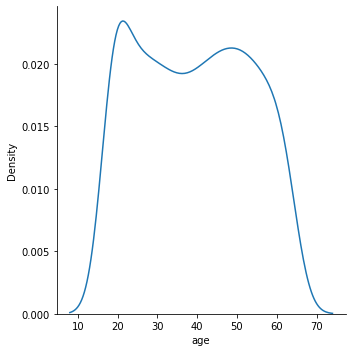

In [ ]:
sns.displot( data= data, x= 'age', kind= 'kde')

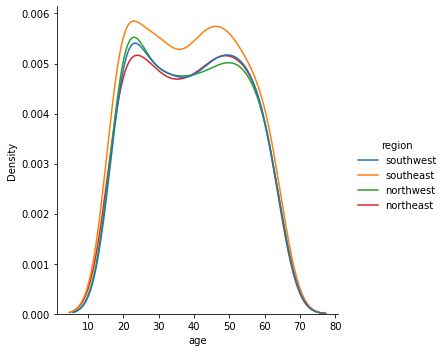

In [ ]:
sns.displot(data= data, x= 'age', hue= 'region', kind= 'kde')

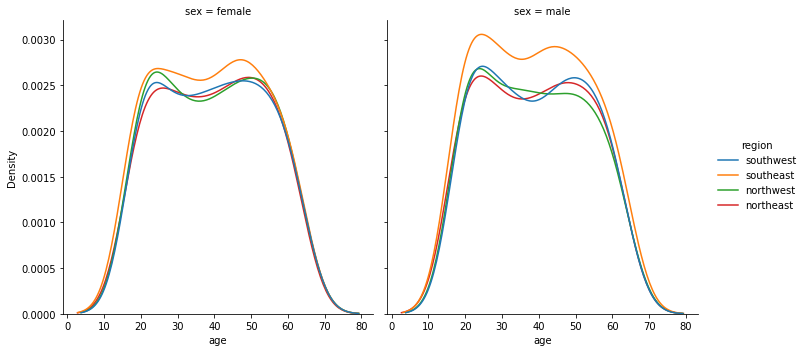

In [ ]:
sns.displot(data= data, x= 'age', hue= 'region', col= 'sex', kind= 'kde' )

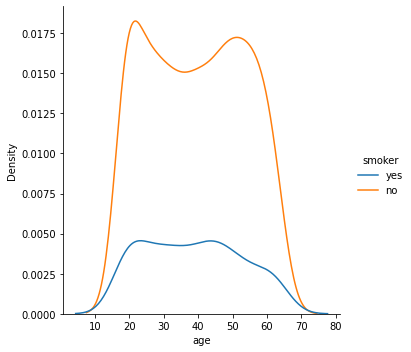

In [ ]:
sns.displot(data= data, x= 'age', hue= 'smoker', kind= 'kde')

In [ ]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

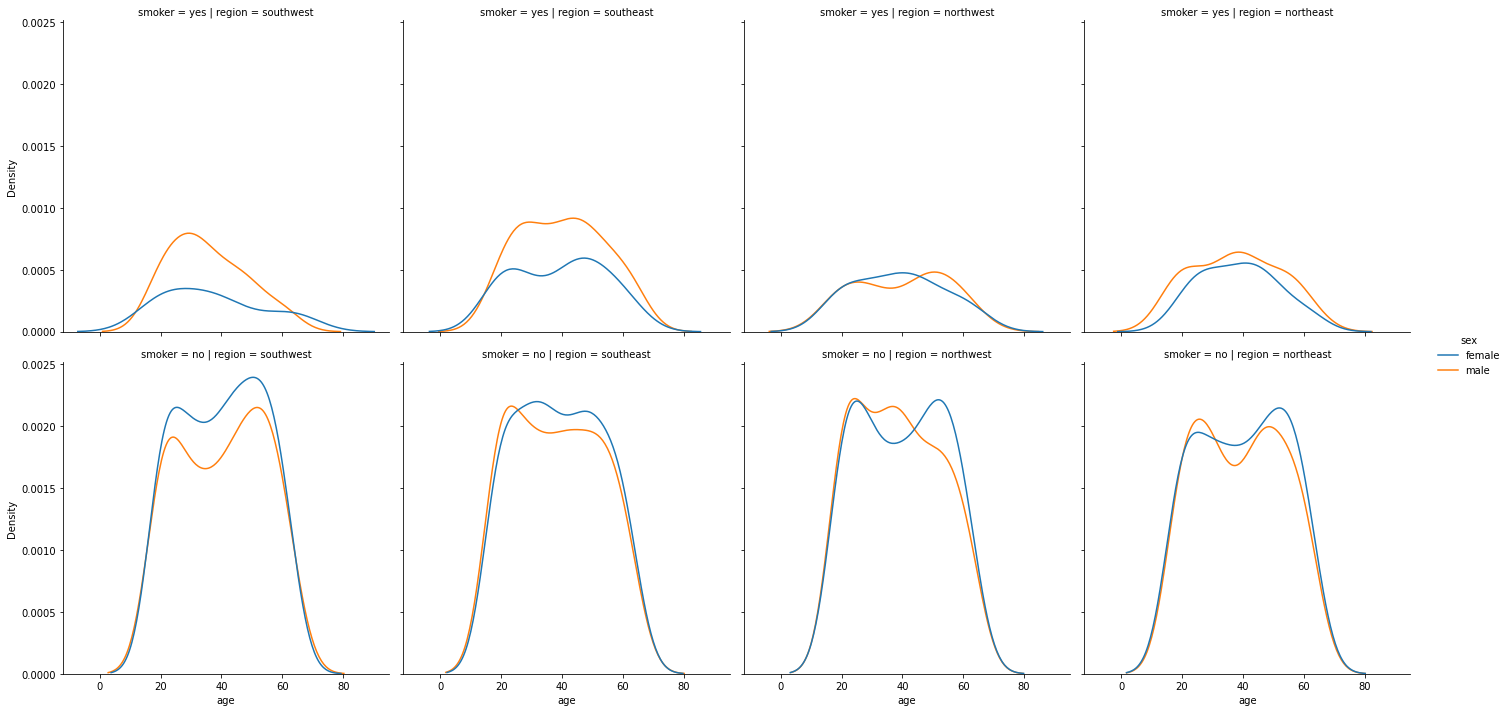

In [ ]:
sns.displot(data= data, x= 'age', hue= 'sex', col= 'region', row= 'smoker', kind= 'kde')

In [ ]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
a=data[data['region']=='northwest']


In [ ]:
b= data['sex']=='female'

In [ ]:
a['smoker'].value_counts()

no     267
yes     58
Name: smoker, dtype: int64

In [ ]:
c= data['region']=='northwest'

### One hot encoding

#### by pd.datafrmae.replace method

In [ ]:
data.replace(['male', 'female'], [0,1], inplace= True)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [ ]:
data['smoker'].replace(['yes', 'no'],[1,0], inplace= True)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [ ]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
data.replace(data['region'].unique(), np.arange(len(data['region'].unique())), inplace= True)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


normalize the data

In [ ]:
norm_data= normalize(data.iloc[:, :-1])
norm_data.head()

,age,sex,bmi,children,smoker,region
0,0.562384,0.029599,0.825816,0.000000,0.029599,0.000000
1,0.470050,0.000000,0.881867,0.026114,0.000000,0.026114
2,0.645257,0.000000,0.760482,0.069135,0.000000,0.023045
3,0.822813,0.000000,0.566120,0.000000,0.000000,0.049867
4,0.741573,0.000000,0.669269,0.000000,0.000000,0.046348


#### by get dummies method

In [ ]:
df= pd.read_csv('/content/insurance.csv')
df= df.iloc[:, :-1]

In [ ]:
df= pd.get_dummies(data= df)
df.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
norm_data_1= normalize(df)
norm_data_1.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.562138,0.825455,0.000000,0.029586,0.000000,0.000000,0.029586,0.0,0.000000,0.000000,0.029586
1,0.469730,0.881266,0.026096,0.000000,0.026096,0.026096,0.000000,0.0,0.000000,0.026096,0.000000
2,0.644915,0.760078,0.069098,0.000000,0.023033,0.023033,0.000000,0.0,0.000000,0.023033,0.000000
3,0.823069,0.566296,0.000000,0.000000,0.024941,0.024941,0.000000,0.0,0.024941,0.000000,0.000000
4,0.741772,0.669449,0.000000,0.000000,0.023180,0.023180,0.000000,0.0,0.023180,0.000000,0.000000


Normlaize data set.



<!-- model training -->

### Dimenctilality Reductin

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca= PCA()
pca.fit(df)

PCA()

Text(0, 0.5, 'Variance Ratio')

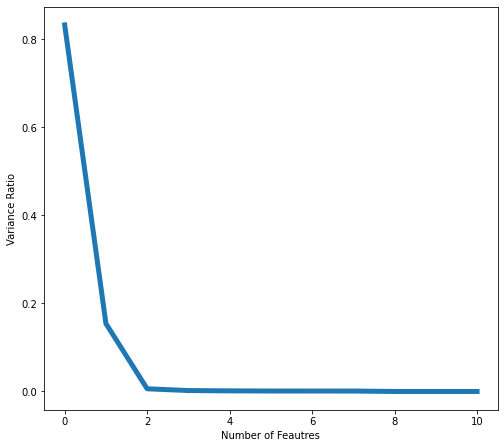

In [ ]:
plt.figure(1, figsize=(9, 8))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=5)
plt.axis('tight')
plt.xlabel('Number of Feautres')
plt.ylabel('Variance Ratio')

In [ ]:
# data[data[data['region']=='northwest']['sex']=='female']

### polynomial features

In [ ]:
poly = PolynomialFeatures(2)
poly_data= poly.fit_transform(data.iloc[:, :-1])
poly_data.shape

(1338, 28)

## model training
* traditional ml
best score model:
1. xgboost data by get dummies method score= 82
2. xgboost on simple data score = 85
3. Svm(kernal= Linear) on poly data score = 83 
4. linear regression on poly_data score= 82

### linear regression

Linear Regression on non normlalize data.

we tried linear regression model on all type of data we had but our best regression model (score= 82) on 
* polynomial feature 2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data['charges'], test_size=0.33, random_state=42)

In [ ]:
model1= LinearRegression()
model1.fit(X_train, y_train)
model1.score(X_test, y_test)

0.7602640802497019

In [ ]:
model1.score(X_test, y_test)

0.7602640802497019

regression on normalize data
* by replacing method

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(norm_data.iloc[:, :-1], data['charges'], test_size=0.33, random_state=42)


In [ ]:
model2= LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

In [ ]:
model2.score(X_test, y_test)

0.5511957679358763

In [ ]:
model2.score(X_train, y_train)

0.5335942582391772

In [ ]:
model2.coef_

array([  262.00518915,  -129.10270377,   342.2658478 ,   373.20803797,
       23693.32775546,   294.4964067 ])

regression by poly-feature 2

In [ ]:
norm= Normalizer()
poly_data_norm= norm.fit_transform(poly_data)
X_train, X_test, y_train, y_test = train_test_split(poly_data_norm, data['charges'], test_size=0.33, random_state=42)
model1= LinearRegression()
model1.fit(X_train, y_train)
model1.score(X_test, y_test)

0.8269757131055061

model by get_dummies data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, data['charges'], test_size=0.33, random_state=42)


In [ ]:
model3= LinearRegression()
model3.fit(X_train, y_train)
model3.score(X_test, y_test)

0.7605492639270064

norm data by get dummies method

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(norm_data_1, data['charges'], test_size=0.33, random_state=42)
model4= LinearRegression()
model4.fit(X_train, y_train)
model4.score(X_test, y_test)

0.6599726723421473

In [ ]:
importance= pd.DataFrame({'feature': df.columns, 
                 'importance': model3.coef_})
importance.sort_values(by= ['importance'], inplace= True)

In [ ]:
importance.head(111)

,feature,importance
5,smoker_no,-11850.491643
9,region_southeast,-378.998890
10,region_southwest,-296.384097
3,sex_female,-60.561843
4,sex_male,60.561843
8,region_northwest,167.882295
0,age,261.568395
1,bmi,347.097290
2,children,371.762169
7,region_northeast,507.500691


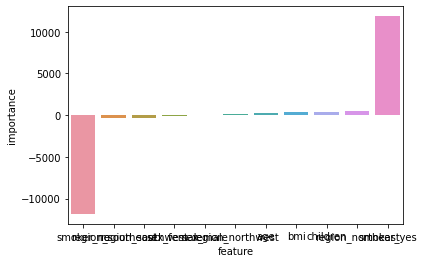

In [ ]:
sns.barplot(data= importance, x= 'feature', y= 'importance')

so far our best result is of model3 non-nomm and by get dummies method.

* model3.score(X_test, y_test)= 0.7605492639270064

#### cros validation

**`Cross validation`**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# from normalizing the data(a= by_get_dummies) 
model4= LinearRegression()
print(cross_val_score(model4, df, data['charges'], cv=5))


[0.76148179 0.70649339 0.77806343 0.73269475 0.75557475]


In [ ]:
from sklearn import linear_model
model5 = linear_model.Lasso()
print(cross_val_score(model5, df, data['charges'], cv=5))

[0.76149331 0.7065482  0.77803078 0.73269774 0.75558356]


cross validation 

In [ ]:
d= data.iloc[:5, [0,-1]]
d.head()

,age,charges
0,19,16884.92400
1,18,1725.55230
2,28,4449.46200
3,33,21984.47061
4,32,3866.85520


* leave one validation

In [ ]:
from sklearn.model_selection import LeaveOneOut,LeaveOneGroupOut, LeavePOut, GridSearchCV
from sklearn.linear_model import Lasso, LassoCV


In [ ]:
laso= Lasso(alpha= 10)
laso.fit(X_train, y_train)
laso.score(X_test, y_test
           )

0.7604293576748208

In [ ]:
reg = LassoCV(cv=4, random_state=0).fit(X_train, y_train)
reg.score(X_test, y_test)

0.7574328442260717

In [ ]:
df.columns

Index(['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [ ]:
laso= Lasso()
laso.fit(df.iloc[:, [0,1]], data['charges'])
laso.score(df.iloc[:, [0,1]], data['charges'])

0.11718338586643406

GridSearchcv

In [ ]:
# laso= Lasso
reg= GridSearchCV(Lasso(), {
    'alpha': [.5,.8,.9, 1, 1.4, 1.8, 2.5]
},
cv= 4)
reg.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [0.5, 0.8, 0.9, 1, 1.4, 1.8, 2.5]})

In [ ]:
reg.cv_results_
pd.DataFrame(reg.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003762,0.001019,0.002278,0.000789,0.5,{'alpha': 0.5},0.795408,0.716955,0.647846,0.755696,0.728976,0.054437,7
1,0.002624,0.000098,0.001677,0.000038,0.8,{'alpha': 0.8},0.795405,0.716969,0.647873,0.755698,0.728986,0.054426,6
2,0.002723,0.000138,0.001768,0.000081,0.9,{'alpha': 0.9},0.795404,0.716974,0.647882,0.755699,0.728990,0.054422,5
3,0.002674,0.000056,0.001777,0.000101,1,{'alpha': 1},0.795403,0.716979,0.647892,0.755700,0.728993,0.054418,4
4,0.002875,0.000187,0.001829,0.000049,1.4,{'alpha': 1.4},0.795400,0.716997,0.647928,0.755703,0.729007,0.054403,3
5,0.002926,0.000355,0.001935,0.000117,1.8,{'alpha': 1.8},0.795396,0.717015,0.647965,0.755706,0.729021,0.054388,2
6,0.003037,0.000500,0.002154,0.000577,2.5,{'alpha': 2.5},0.795390,0.717048,0.648028,0.755712,0.729044,0.054361,1


poly_data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(poly_data, data['charges'], test_size=0.33, random_state=42)
model1= LinearRegression()
model1.fit(X_train, y_train)
model1.score(X_test, y_test)

0.8548187870064632

pca

In [ ]:
norm= Normalizer()
poly_data_norm= norm.fit_transform(poly_data)
X_train, X_test, y_train, y_test = train_test_split(poly_data_norm, data['charges'], test_size=0.33, random_state=42)
model1= LinearRegression()
model1.fit(X_train, y_train)
model1.score(X_test, y_test)

0.8269757131055061

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(poly_data, data['charges'], test_size=0.33, random_state=42)
model6= svm.SVR(C=.8, epsilon=.2, kernel='poly')
model6.fit(X_train, y_train)
model6.score(X_test, y_test)

-0.059972433767097266

### svm 
* best score 
* poly_data , kernal = Linear , score = 82

In [ ]:
from sklearn import svm

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[ : , :-1], data['charges'], test_size=0.33, random_state=42)
model6= svm.SVR(C=.2, epsilon=.8, kernel='poly')
model6.fit(X_train, y_train)
model6.score(X_test, y_test)

-0.07875199426381663

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(poly_data, data['charges'], test_size=0.33, random_state=42)
model7= svm.SVR(C=1, epsilon=.2, kernel='linear')
model7.fit(X_train, y_train)
model7.score(X_test, y_test)
# C=1.0, epsilon=0.2

0.8209758449376109

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(poly_data, data['charges'], test_size=0.33, random_state=42)
model8= svm.SVR(C=1, epsilon=.2, kernel='poly')
model8.fit(X_train, y_train)
model8.score(X_test, y_test)

-0.06070408060685262

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, data['charges'], test_size=0.33, random_state=42)
model7= svm.SVR()
model7.fit(X_train, y_train)
model7.score(X_test, y_test)
# C=1.0, epsilon=0.2

-0.0823484057595214

In [ ]:
model7.score(X_train, y_train)

0.9999999998462797

In [ ]:
-0.07486571632889194

In [ ]:
reg= GridSearchCV(svm.SVR(), {
    'C': [.5,1,3,5, 10, 15],
    'epsilon': [.5, .9, 1.5, 2.3 ],
    'kernel' : [ 'rbf', 'linear', 'rbf']
},
cv= 2)
reg.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=SVR(),
             param_grid={'C': [0.5, 1, 3, 5, 10, 15],
                         'epsilon': [0.5, 0.9, 1.5, 2.3],
                         'kernel': ['rbf', 'linear', 'rbf']})

In [ ]:
reg.cv_results_
pd.DataFrame(reg.cv_results_)

In [ ]:
svm.SVR().get_params().keys()

dict_keys(['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'])

### xgboost regression 

on simple data

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data['charges'], test_size=0.33, random_state=42)
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.8587564507821005

on poly data

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
X_train, X_test, y_train, y_test = train_test_split(poly_data, data['charges'], test_size=0.33, random_state=42)
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.85865374362518

data by get dummies

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
X_train, X_test, y_train, y_test = train_test_split(df, data['charges'], test_size=0.33, random_state=42)
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.8604642394269819

In [ ]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, [0,2]], data['charges'], test_size=0.33, random_state=42)
reg1 = GradientBoostingRegressor(random_state=0)
reg1.fit(X_train, y_train)
reg1.score(X_test, y_test)

-0.016884241654798515

## Artifical neural network

trian loss= 0.7017920613288879
validation loss= 0.7144746780395508


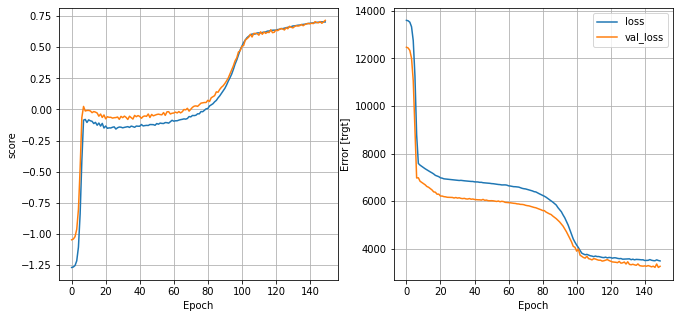

In [ ]:
norm_data= normalize(data.iloc[:, :-1])
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data['charges'], test_size=0.33, random_state=42)

model8= Sequential([
    layers.Dense(16,activation = 'relu'),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(32,activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1 , activation = 'linear')

])
model8.compile(
    loss= 'mae',
    optimizer= Adam(),
    metrics= [RSquare()]
)
history= model8.fit(X_train, y_train,validation_split=.2, verbose= 0,epochs= 150)
plot_loss(history)

In [ ]:
history.params

{'verbose': 0, 'epochs': 100, 'steps': 23}

trian loss= 0.66846764087677
validation loss= 0.6620731353759766


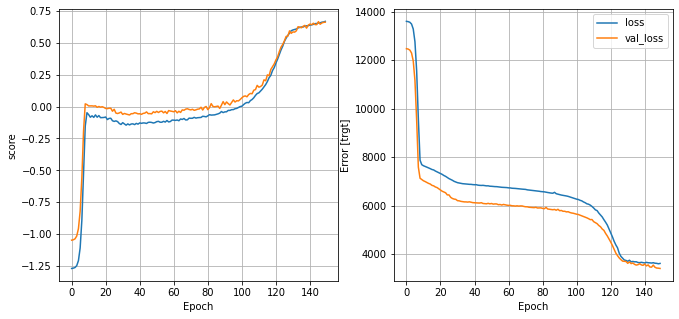

In [ ]:
import datetime
norm_data= normalize(data.iloc[:, :-1])
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data['charges'], test_size=0.33, random_state=42)
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
model9= Sequential([
    layers.Dense(16,activation = 'relu'),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(32,activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1 , activation = 'linear')

])
model9.compile(
    loss= 'mae',
    optimizer= Adam(),
    metrics= [RSquare()]
)
history= model9.fit(X_train, y_train,validation_split=.2 ,verbose= 0,epochs= 150,callbacks=[tensorboard_callback])
plot_loss(history)

In [ ]:
%tensorboard

UsageError: Line magic function `%tensorboard` not found.


In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

In [ ]:
tf.__version__

'2.9.2'

In [ ]:
pred= model8.predict(X_test)
pred.shape
r2_score(y_test, pred)

14/14 [==============================] - 0s 2ms/step


0.03531790942830493

trian loss= 0.027095437049865723
validation loss= 0.096310555934906


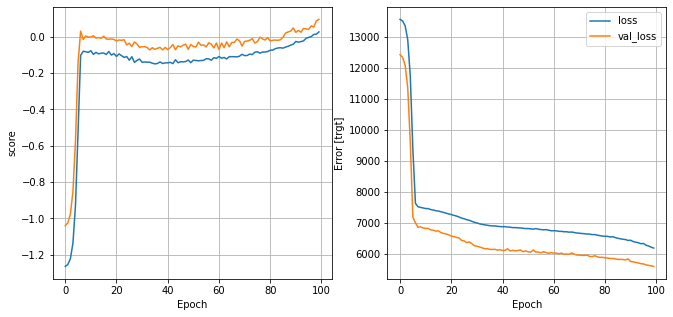

In [ ]:
plot_loss(history)

In [ ]:
pred= model8.predict(X_train)
pred.shape
r2_score(y_train, pred)

28/28 [==============================] - 0s 3ms/step


0.0588482606336298

In [ ]:
y_test.shape

(442,)

In [ ]:
print(history.history['val_r_square'][-1])
print(history.history['r_square'][-1])

0.096310555934906
0.027095437049865723


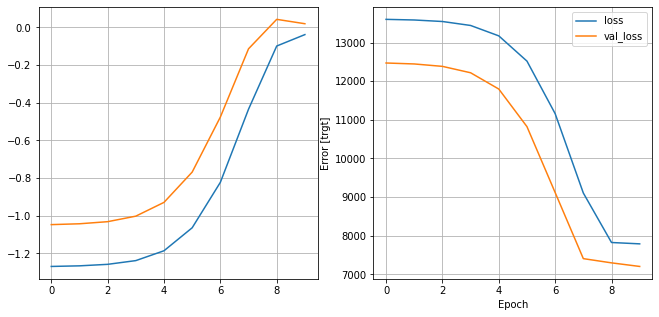

In [ ]:
plot_loss(history)

In [ ]:
def plot_loss(history):
  a= history.history['r_square'][-1]
  b= history.history['val_r_square'][-1]
  print(f'trian loss= {a}')
  print(f'validation loss= {b}')
  plt.figure(figsize= (11,5))
  plt.subplot(1 ,2,1)
  plt.plot(history.history['r_square'], label='score')
  plt.plot(history.history['val_r_square'], label='val_score')
  plt.xlabel('Epoch')
  plt.ylabel('score')
  plt.grid(True)
  # plt.ylim([40, 200])
  plt.subplot(1 ,2,2)
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [trgt]')
  plt.legend()
  plt.grid(True)

In [ ]:
pred= model8.predict(X_test)
# pred= np.squeeze(pred, axis= -1)
score= r2_score(y_test, pred)
score

14/14 [==============================] - 0s 1ms/step


-1.0208114976155054

In [ ]:
score= r2_score(y_test, pred)

In [ ]:
score

0.8587564507821005

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  # plt.ylim([40, 200])
  plt.xlabel('Epoch')
  plt.ylabel('Error [trgt]')
  plt.legend()
  plt.grid(True)

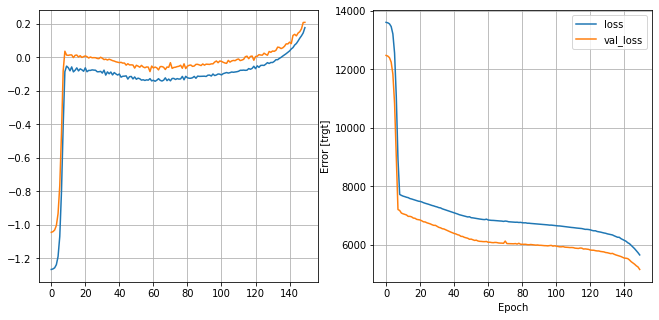

In [ ]:
norm_data= normalize(data.iloc[:, :-1])
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data['charges'], test_size=0.33, random_state=42)

model8= Sequential([
    layers.Dense(16,activation = 'relu'),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(32,activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1 , activation = 'linear')

])
model8.compile(
    loss= 'mae',
    optimizer= Adam(),
    metrics= [RSquare()]
)
history= model8.fit(X_train, y_train,validation_split=.2, verbose= 0,epochs= 150)
plot_loss(history)

trian loss= 0.17742812633514404
validation loss= 0.20914727449417114


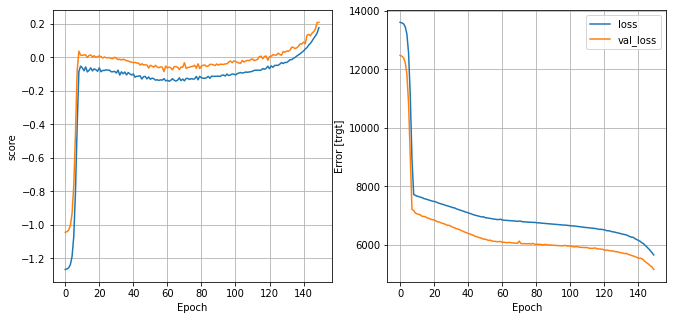

In [ ]:
plot_loss(history)

In [ ]:
history.params

{'verbose': 0, 'epochs': 150, 'steps': 23}

In [ ]:
dir(history)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_chief_worker_only',
 '_implements_predict_batch_hooks',
 '_implements_test_batch_hooks',
 '_implements_train_batch_hooks',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_supports_tf_logs',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

In [ ]:
dir(model8)

['_SCALAR_UPRANKING_ON',
 '_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_base_model_initialized',
 '_build_graph_network_for_inferred_shape',
 '_build_input_shape',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_arg_defaults',
 '_call_fn_arg_positions',
 '_call_fn_args',
 '_call_full_argspec',
 '_callable_losses',
 '_ca

In [ ]:
model8.optimizer

23/23 [==============================] - 1s 12ms/step - loss: 13578.0625 - r_square: -1.2650 - val_loss: 12429.5400 - val_r_square: -1.0402


Optimizer : 'RMSprop 
 Leraning_rate : 0.001


Traning Score : -1.2649586200714111
Val Score : -1.0402188301086426




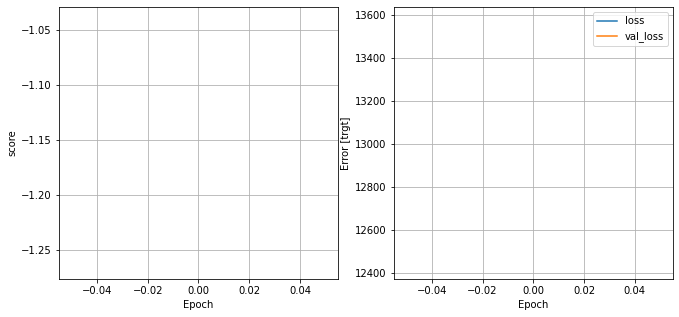

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data['charges'], test_size=0.33, random_state=42)
# from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense
model2=Sequential([
    Dense(128),
    Dense(128, activation = 'tanh'), 
    Dense(252, activation = 'tanh'),
    Dense(80, activation = 'relu'),
    Dense(1, activation = 'linear')
])
model2.compile(loss= 'mae', 
               optimizer= 'RMSprop',
               metrics= [RSquare()])
history= model2.fit(X_train, y_train,epochs=1, 
    batch_size=32,
    validation_split=0.2)
plot_loss(history)

In [ ]:
i=model2.optimizer

In [ ]:
print(i)

In [ ]:
history.model.optimizer.learning_rate

TypeError: ignored

In [ ]:
n= np.array(i)
n

array('<keras.optimizers.optimizer_v2.gradient_descent.SGD object at 0x7ff2b27214f0>',
      dtype='<U77')

In [ ]:
print(f'optimizer and learning rate:  {str(history.model.optimizer.learning_rate)}')

optimizer and learning rate:  <tf.Variable 'SGD/learning_rate:0' shape=() dtype=int32, numpy=1>


In [ ]:
history.model.optimizer.learning_rate

<tf.Variable 'RMSprop/learning_rate:0' shape=() dtype=float32, numpy=0.001>

In [ ]:
a= str(history.model.optimizer.learning_rate)


In [ ]:
a.split()[-1].split('=')[-1].replace('>', '')

'0.001'

In [ ]:
a.split()[1].split('/')[0], 

("'Adam",)

In [ ]:
a[1].split('/')[0]

"'SGD"

In [ ]:
print('hello \n baf')

hello 
 baf


In [ ]:
p=a[1].split('/')[0]
print(f'hlel {p}')

hlel t


In [ ]:
int(f'optimizer and learning rate:  {str(history.model.optimizer.learning_rate)}')

In [ ]:
print(f' optimizer : {i.split()[1].split('/')[0]}')
# leraning_rate : {a.split()[-1].split('=')[-1].replace('>', '')})


SyntaxError: ignored

In [ ]:
def plot_loss(history):
  # print(str(history.model.optimizer.learning_rate))
  i= str(history.model.optimizer.learning_rate)
  # string methods
  print('\n')
  o= i.split()[1].split('/')[0]
  l= i.split()[-1].split('=')[-1].replace('>', '')
  print(f'Optimizer : {o} \n Leraning_rate : {l}')
  print('\n')
  a= history.history['r_square'][-1]
  b= history.history['val_r_square'][-1]
  print(f'Traning Score : {a}')
  print(f'Val Score : {b}')
  print('\n')
  plt.figure(figsize= (11,5))
  plt.subplot(1 ,2,1)
  plt.plot(history.history['r_square'], label='score')
  plt.plot(history.history['val_r_square'], label='val_score')
  plt.xlabel('Epoch')
  plt.ylabel('score')
  plt.grid(True)
  # plt.ylim([40, 200])
  plt.subplot(1 ,2,2)
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [trgt]')
  plt.legend()
  plt.grid(True)

### best NN model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(norm_data, data['charges'], test_size=0.33, random_state=42)
model =Sequential([
      
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(252, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(1)
  ])
model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.005))
history = model.fit(X_train,y_train,validation_split=0.2,
    verbose=0, epochs=250)

score=r2_score(y_test, model.predict(X_test))
print(score)

14/14 [==============================] - 0s 3ms/step
0.8350141434544954


# extra

In [ ]:
x=np.arange(0, 30, 1)
y1= np.multiply(x, 2)
y2= np.power(x, 2)
y3= np.power(x, 3)
y4= np.power(x, 4)
# y3= 3(x-np.random.rand(1))*2 + x3
y5= np.add(np.multiply(np.power(np.subtract(x, np.random.randint(0,8 )), 2), 3), np.power(x, 3))
Y= [y2, y3, y4, y5]
x=np.expand_dims(x, axis =-1)
for i in Y:
  i= np.expand_dims(i, axis= -1)
  print(i.shape)


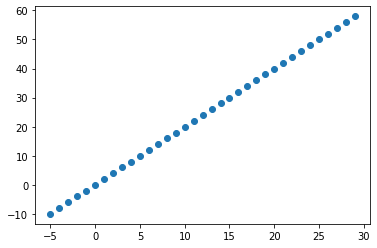

In [ ]:
y1= np.expand_dims(y1, axis = -1)
plt.scatter(x, y1)

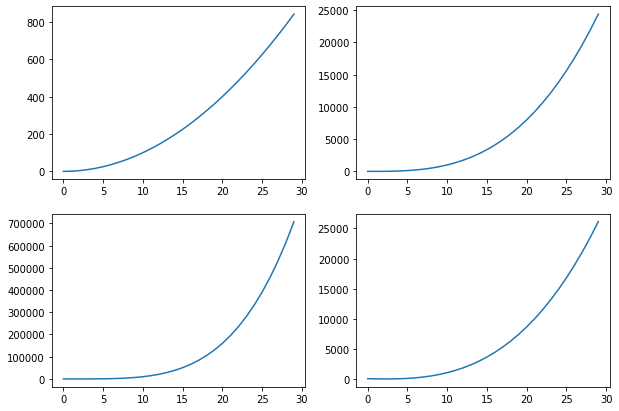

In [ ]:
plt.figure(figsize=(10, 7))
a= 1
for i in Y:
  plt.subplot(2, 2,a)
  plt.plot(x, i)
  a+=1

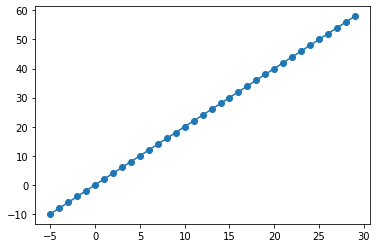

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y1, test_size=0.1, random_state=42)
model0= LinearRegression()
model0.fit(X_train, y_train)
model0.score(X_test, y_test)
pred= model0.predict(x)
plt.scatter(x, y1)
plt.plot(x, pred)

In [ ]:
model1.intercept_

array([-7.10542736e-15])

In [ ]:
for i in Y:
  X_train, X_test, y_train, y_test = train_test_split(x, i, test_size=0.1, random_state=42)
  model1= LinearRegression()
  model1.fit(X_train, y_train)
  print(model1.score(X_test, y_test))

0.897652441077752
0.7925806126873594
0.7190868537838793
0.7947597218184074


In [ ]:
import datetime
X_train, X_test, y_train, y_test = train_test_split(x, y1, test_size=0.1, random_state=42)
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
model2= Sequential([
    Dense(1)   
])
model2.compile(
    loss= 'mae',
    optimizer= 'sgd', 
    metrics= [RSquare()]
)
model2.fit(X_train, y_train,,  epochs = 5,callbacks=[tensorboard_callback])

Epoch 1/5
1/1 [==============================] - 0s 310ms/step - loss: 10.0626 - r_square: 0.5237
Epoch 2/5
1/1 [==============================] - 0s 16ms/step - loss: 8.1758 - r_square: 0.6854
Epoch 3/5
1/1 [==============================] - 0s 15ms/step - loss: 6.2893 - r_square: 0.8137
Epoch 4/5
1/1 [==============================] - 0s 15ms/step - loss: 4.4028 - r_square: 0.9086
Epoch 5/5
1/1 [==============================] - 0s 16ms/step - loss: 2.5163 - r_square: 0.9700


In [ ]:
model2.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.get_weights()

[array([[1.9809005]], dtype=float32), array([0.02666666], dtype=float32)]

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs/fit